In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.manifold import Isomap

In [2]:
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)

In [3]:
image_shape = people.images[0].shape
image_shape

(87, 65)

In [4]:
print("people.images.shape: {}".format(people.images.shape))
print("Number of classes: {}".format(len(people.target_names)))

people.images.shape: (3023, 87, 65)
Number of classes: 62


In [5]:
people.target[:10]

array([61, 25,  9,  5,  1, 10, 48, 17, 13, 54], dtype=int64)

In [6]:
people.target_names

array(['Alejandro Toledo', 'Alvaro Uribe', 'Amelie Mauresmo',
       'Andre Agassi', 'Angelina Jolie', 'Ariel Sharon',
       'Arnold Schwarzenegger', 'Atal Bihari Vajpayee', 'Bill Clinton',
       'Carlos Menem', 'Colin Powell', 'David Beckham', 'Donald Rumsfeld',
       'George Robertson', 'George W Bush', 'Gerhard Schroeder',
       'Gloria Macapagal Arroyo', 'Gray Davis', 'Guillermo Coria',
       'Hamid Karzai', 'Hans Blix', 'Hugo Chavez', 'Igor Ivanov',
       'Jack Straw', 'Jacques Chirac', 'Jean Chretien',
       'Jennifer Aniston', 'Jennifer Capriati', 'Jennifer Lopez',
       'Jeremy Greenstock', 'Jiang Zemin', 'John Ashcroft',
       'John Negroponte', 'Jose Maria Aznar', 'Juan Carlos Ferrero',
       'Junichiro Koizumi', 'Kofi Annan', 'Laura Bush',
       'Lindsay Davenport', 'Lleyton Hewitt', 'Luiz Inacio Lula da Silva',
       'Mahmoud Abbas', 'Megawati Sukarnoputri', 'Michael Bloomberg',
       'Naomi Watts', 'Nestor Kirchner', 'Paul Bremer', 'Pete Sampras',
       'Rece

In [7]:
people.data.shape

(3023, 5655)

In [8]:
people.target_names[people.target[0]]

'Winona Ryder'

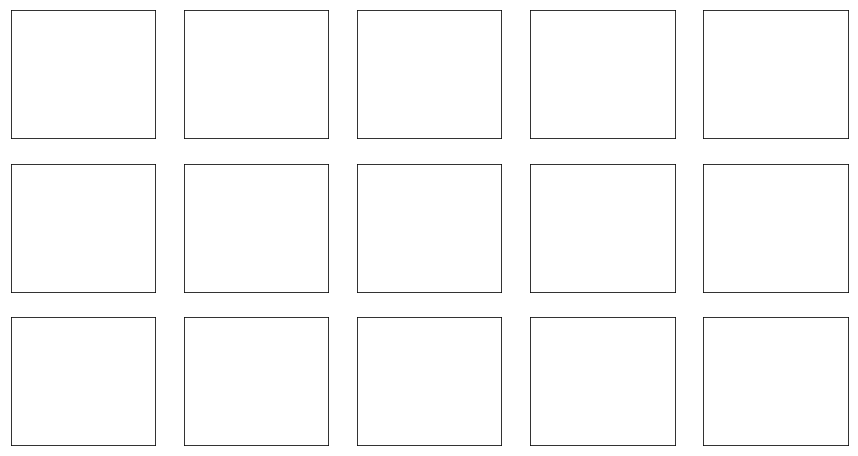

In [9]:
fig, axes = plt.subplots(3,5,figsize=(15, 8),subplot_kw=dict(xticks=[], yticks=[]))

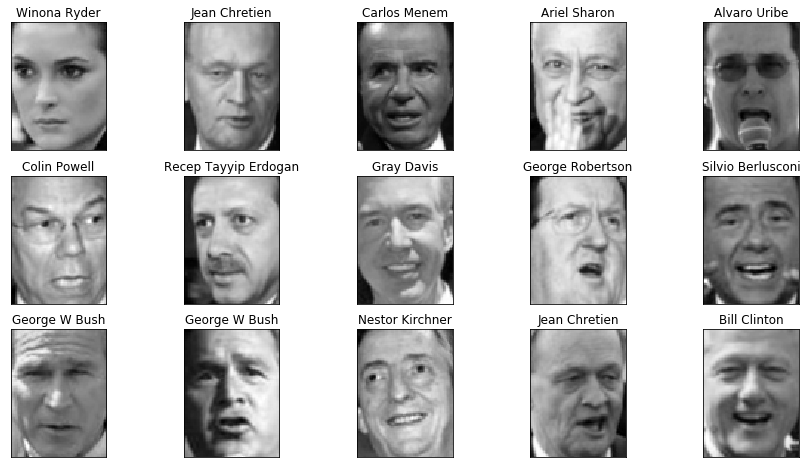

In [10]:
fig, axes = plt.subplots(3,5,figsize=(15, 8),subplot_kw=dict(xticks=[], yticks=[]))
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image, cmap='gray')
    ax.set_title(people.target_names[target])

In [11]:
counts = np.bincount(people.target)
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print("{0:25} {1:3}".format(name, count), end=' ')
    if (i + 1) % 3 == 0:
        print()

Alejandro Toledo           39 Alvaro Uribe               35 Amelie Mauresmo            21 
Andre Agassi               36 Angelina Jolie             20 Ariel Sharon               77 
Arnold Schwarzenegger      42 Atal Bihari Vajpayee       24 Bill Clinton               29 
Carlos Menem               21 Colin Powell              236 David Beckham              31 
Donald Rumsfeld           121 George Robertson           22 George W Bush             530 
Gerhard Schroeder         109 Gloria Macapagal Arroyo    44 Gray Davis                 26 
Guillermo Coria            30 Hamid Karzai               22 Hans Blix                  39 
Hugo Chavez                71 Igor Ivanov                20 Jack Straw                 28 
Jacques Chirac             52 Jean Chretien              55 Jennifer Aniston           21 
Jennifer Capriati          42 Jennifer Lopez             21 Jeremy Greenstock          24 
Jiang Zemin                20 John Ashcroft              53 John Negroponte            31 

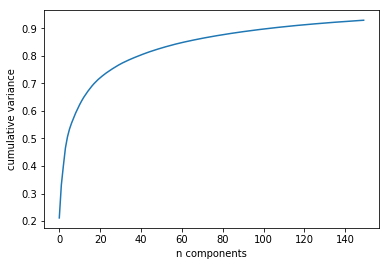

In [12]:
pca = PCA(n_components=150).fit(people.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('n components')
plt.ylabel('cumulative variance');

In [13]:
pca = PCA(n_components=100, whiten=True, random_state=0)
X_scaled = people.data/255.
X_pca = pca.fit_transform(X_scaled)
print("X_train_pca.shape: {}".format(X_pca.shape))


X_train_pca.shape: (3023, 100)


In [14]:
X_recovered = pca.inverse_transform(X_pca)
X_recovered = X_recovered * 255.
images_recovered = [image.reshape(image_shape) for image in X_recovered]

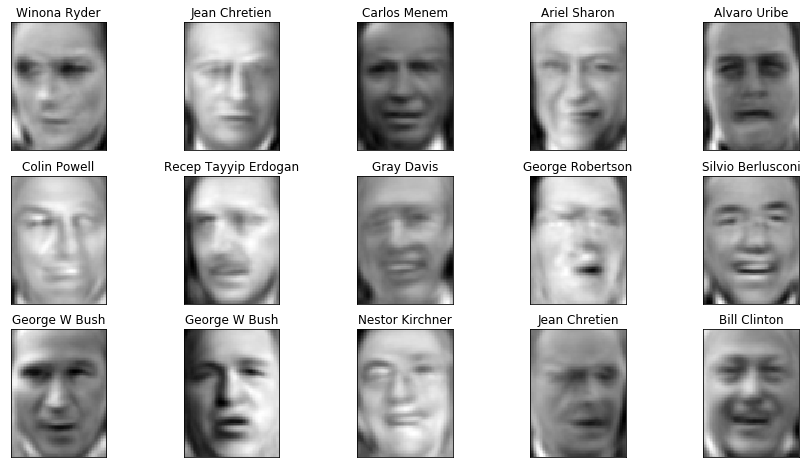

In [15]:
fig, axes = plt.subplots(3,5,figsize=(15, 8),subplot_kw=dict(xticks=[], yticks=[]))
for target, image, ax in zip(people.target, images_recovered, axes.ravel()):
    ax.imshow(image, cmap='gray')
    ax.set_title(people.target_names[target])

In [16]:
tsne = TSNE(random_state=42)
img_tsne = tsne.fit_transform(people.data)

In [17]:
img_tsne.shape

(3023, 2)

In [18]:
img_tsne[:,0]

array([ -8.161428  , -26.624802  ,   0.50568676, ...,   2.369061  ,
       -13.513322  ,  23.88195   ], dtype=float32)

In [19]:
img_tsne[:,0].min(),img_tsne[:,0].max()

(-50.162247, 53.843742)

In [20]:
def display_2d_component_names(model,selected,dataobj):
    colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525","#A83683", "#4E655E", "#853541",
          "#3A3120", "#535D8E"]
    plt.figure(figsize=(14, 14))
    plt.xlim(model[:, 0].min(), model[:, 0].max() + 1)
    plt.ylim(model[:, 1].min(), model[:, 1].max() + 1)
    for i in range(len(dataobj.data)):
        cindex = dataobj.target[i]%len(selected)
        if dataobj.target[i] not in selected:
            continue
        plt.text(model[i, 0], model[i, 1], str(dataobj.target_names[dataobj.target[i]]),
                 color = colors[cindex],fontdict={'weight': 'bold', 'size': 9})
    plt.xlabel("model feature 0")
    plt.ylabel("model feature 1")


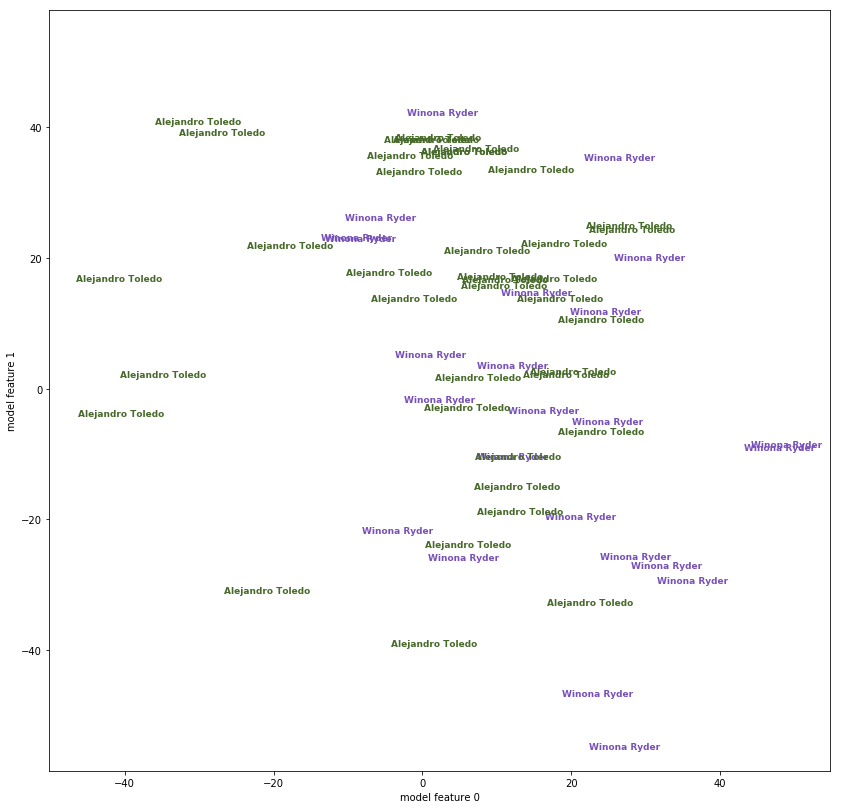

In [21]:
display_2d_component_names(img_tsne,(0,61),people)

In [22]:
iso = Isomap(n_components=2)
img_iso = iso.fit_transform(people.data)

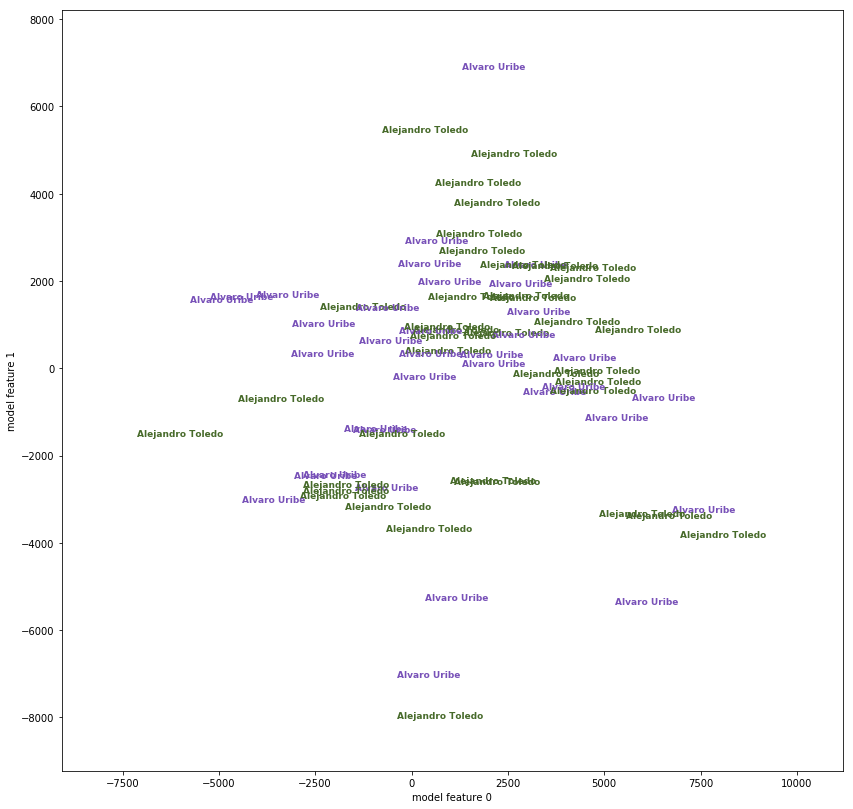

In [23]:
display_2d_component_names(img_iso,(0,1),people)

PCA,TSNE and ISOMAP on MNIST DIGITS

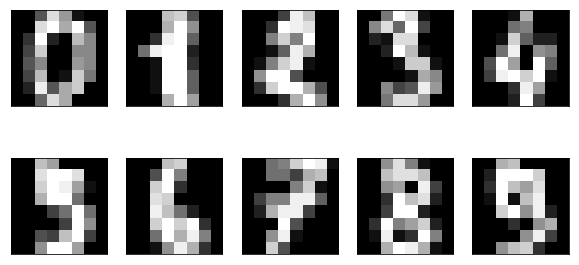

In [24]:
from sklearn.datasets import load_digits
digits = load_digits()
fig, axes = plt.subplots(2, 5, figsize=(10, 5),
subplot_kw={'xticks':(), 'yticks': ()})
for ax, img in zip(axes.ravel(), digits.images):
    ax.imshow(img,cmap=cm.gray)

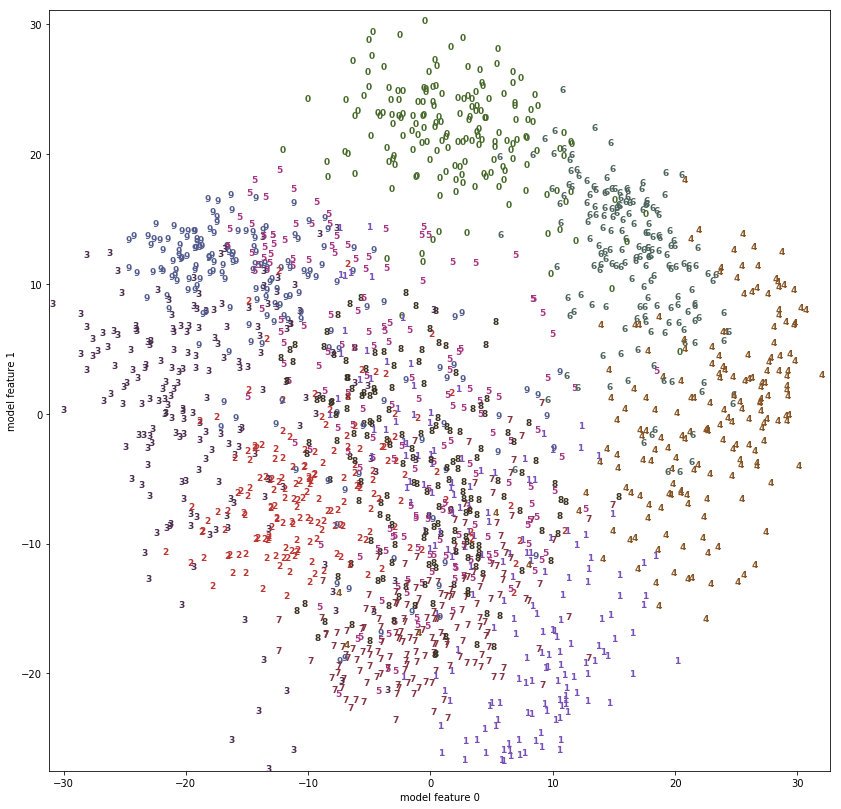

In [25]:
pca = PCA(n_components=2)
pca.fit(digits.data)
digits_pca = pca.transform(digits.data)
display_2d_component_names(digits_pca,(0,1,2,3,4,5,6,7,8,9),digits)

In [26]:
tsne = TSNE(random_state=42)
digits_tsne = tsne.fit_transform(digits.data)



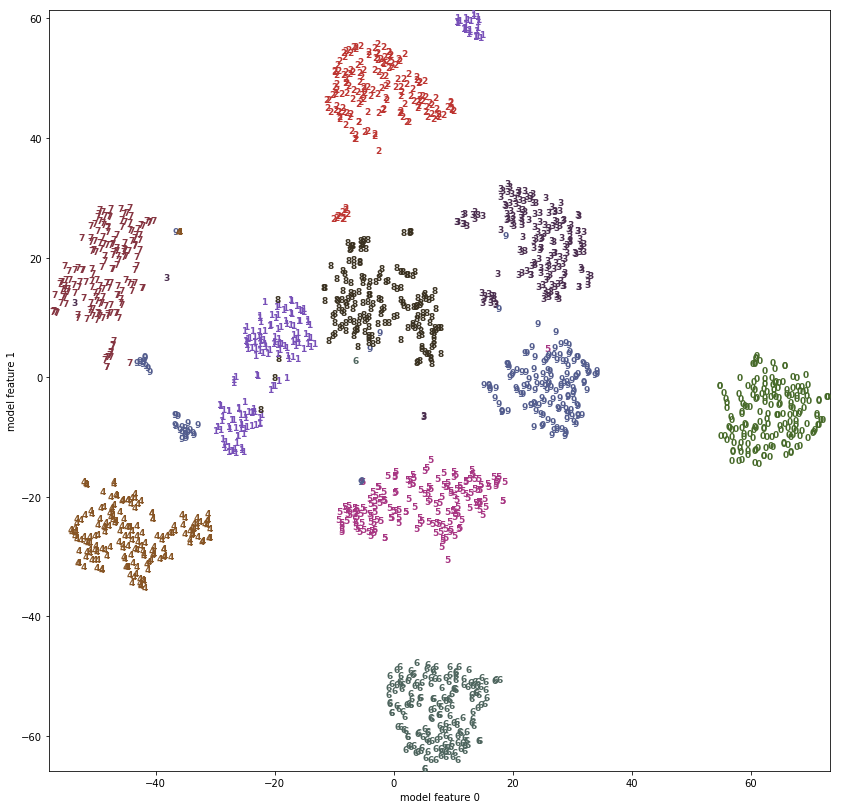

In [27]:
display_2d_component_names(digits_tsne,(0,1,2,3,4,5,6,7,8,9),digits)

In [28]:
iso = Isomap(n_neighbors=10, n_components=2)
digits_iso = iso.fit(digits.data).transform(digits.data)


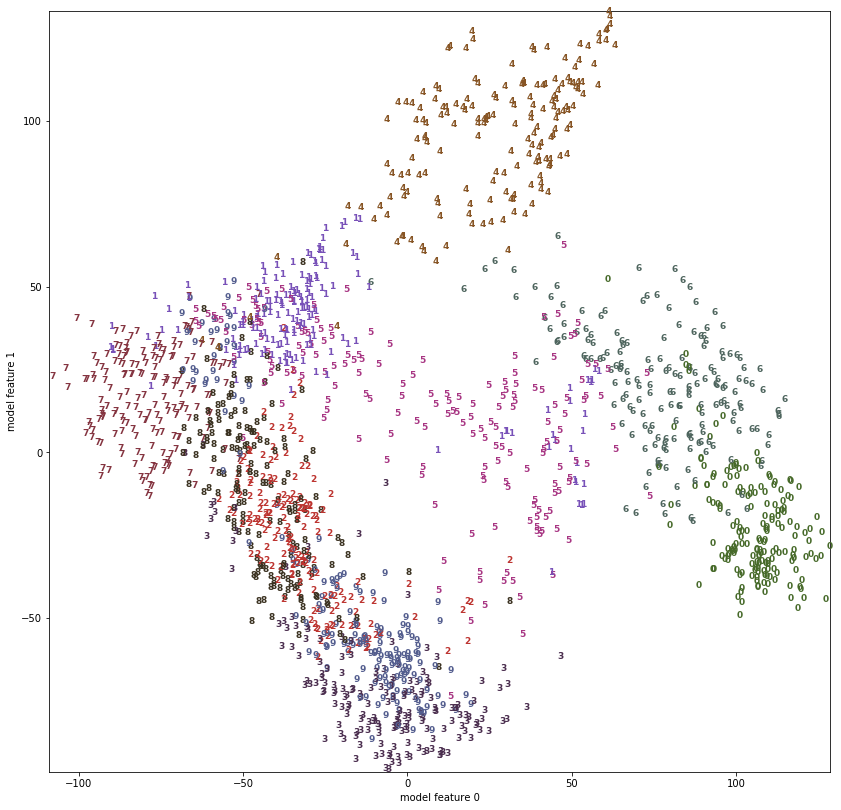

In [29]:
display_2d_component_names(digits_iso,(0,1,2,3,4,5,6,7,8,9),digits)